# Assignment 9: Optimization Algorithms and Convolution Neural Networks (deadline: 12 Jan, 23:59)

For theoretical tasks you are encouraged to write in $\\LaTeX$. Jupyter notebooks support them by default. For reference, please have a look at the examples in this short excellent guide: [Typesetting Equations](http://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Typesetting%20Equations.ipynb)

Alternatively, you can upload the solutions in the written form as images and paste them inside the cells. But if you do this, **make sure** that the images are of high quality, so that we can read them without any problems.

### Exercise 1. Visualizing Optimization Algorithms in Deep Neural Networks (6 points)

**Goal:** Study applying optimization algorithms to an Error Surface.

In this task, we will get familiar with various optimization methods such as *Vanilla Gradient Descent (GD), [Gradient Descent with Momentum](https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer), [RMSProp](https://www.tensorflow.org/api_docs/python/tf/train/RMSPropOptimizer) and [AdaGrad](https://www.tensorflow.org/api_docs/python/tf/train/AdagradOptimizer)* by implementing them in TensorFlow and *visualizing* the path (convergence) towards minima using [Matplotlib 3D/Contour plots](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html).

In [ ]:
# imports
import math
import random
import numpy as np
import tensorflow as tf
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['figure.figsize'] = (12.0, 8.0)

**3D Error Surface**

The 3D error surface `z` that we will use for visualizing the behaviour of different optimization methods is defined as:

$$ term1 = \frac{2}{\sqrt{(2\pi \sigma_{1}^{2})^{2}}} * \exp{\left(- \left[ \frac{(x-\mu_1)^2}{(\frac{\sigma_{1}}{2})^2} + \frac{(y-\mu_1)^2}{(\sigma_1)^2}     \right] \right)} $$

$$ term2 = \frac{1}{\sqrt{(2\pi \sigma_{2}^{2})^{2}}} * \exp{\left(- \left[ \frac{(x-\mu_2)^2 + (y-\mu_2)^2}{(\sigma_2)^2} \right] \right)} $$

$$ term3 = \frac{1}{20} * \left(x^2  + xy + y^2 \right) $$ <br>

$$ z = term1 - term2 + term3 $$

a) To make yourself comfortable working with this function and to get a good visualization of how this function looks like, implement the function (you can use $\color{blue}{NumPy}$) below at `# TODO`. This function will be plotted using [matplotlib-3D-wireframe](https://matplotlib.org/devdocs/gallery/mplot3d/wire3d.html) using the code and parameter values provided. (**1 point**)

In [ ]:
# params of our error surface `z`
sigma_1 = 1.0
sigma_2 = 2.0
mu_1 = 0.5
mu_2 = 0.0
range_x, range_y = np.arange(-2.0, 3.0, 0.5), np.arange(-2.0, 2.0, 0.5)

def func_z(X, Y):
    """
    function definition of our 3D error surface
    """
    
    # TODO Implement the 3D Error Surface described above

In [ ]:
X_sparse, Y_sparse = np.meshgrid(range_x, range_y)
Z_sparse = func_z(X_sparse, Y_sparse)

# Implement wireframe plot for func_z
plt.clf()
fig = plt.figure(figsize=(16, 7))
ax1 = fig.add_subplot(111,projection='3d')

ax1.plot_wireframe(X_sparse, Y_sparse, Z_sparse, linewidth=1)

For the rest of this task, we will be using 3D wireframe plot as the left `subplot` and a [contour plot](https://matplotlib.org/examples/pylab_examples/contour_demo.html) as the right `subplot` for visulization purposes.

In [ ]:
# x,y values for `Wireframe` plot
x_wireframe, y_wireframe = np.arange(-2.0, 3.0, 0.5), np.arange(-2.0, 2.0, 0.5)

# x,y values for `Contour` plot
x_contour, y_contour = np.arange(-2.0, 3.0, 0.1), np.arange(-2.0, 2.0, 0.1)

# Following code implements the plotting the Error Surface
X_sparse, Y_sparse = np.meshgrid(x_wireframe, y_wireframe)
Z_sparse = func_z(X_sparse, Y_sparse)

X_dense, Y_dense = np.meshgrid(x_contour, y_contour)
Z_dense = func_z(X_dense, Y_dense)

plt.clf()
fig = plt.figure(figsize=(16, 7))
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

ax1.plot_wireframe(X_sparse, Y_sparse, Z_sparse, linewidth=1, cmap=cm.jet, zorder=1, alpha=0.6)
ax2.contour(X_dense, Y_dense, Z_dense, 32,  cmap=cm.jet)

ax1.set_xlabel(r'$x$',fontsize=18)
ax1.set_ylabel(r'$y$',fontsize=18)
ax1.set_title('3D Surface', fontsize=18)

ax2.contour(X_dense, Y_dense, Z_dense, 32,  cmap=cm.jet)
ax2.autoscale(False)
ax2.set_title('Contour plot', fontsize=18)

plt.show()

b) Next, implement the 3D Error Surface described above using tensorflow variables defined in the `problem_3d` function below. Write your code as specified by `# TODO` **(2 points)**

In [ ]:
# The following variables  will come in handy when implementing the error surface using tensorflow functions below
tf_x, tf_y, tf_z, = None, None, None
tf_reinit_x, tf_reinit_y = None, None
session = None

def problem_3d(start_x, start_y):
    global session
    global tf_x, tf_y, tf_z
    global tf_reinit_x, tf_reinit_y
    
    tf.reset_default_graph()
    session = tf.InteractiveSession()

    with tf.variable_scope('opt'):
        tf_x = tf.get_variable('x', initializer=tf.constant(start_x, shape=None, dtype=tf.float32))
        tf_y = tf.get_variable('y', initializer=tf.constant(start_y, shape=None, dtype=tf.float32))

    with tf.variable_scope('opt', reuse=True):
        tf_reinit_x = tf.assign(tf.get_variable('x'), start_x)
        tf_reinit_y = tf.assign(tf.get_variable('y'), start_y)
    
    # TODO Implement 3D error surface using the above defined variables

**Running and plotting Gradient Descent, [Gradient Descent with Momentum](https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer), [RMSProp](https://www.tensorflow.org/api_docs/python/tf/train/RMSPropOptimizer) and [AdaGrad](https://www.tensorflow.org/api_docs/python/tf/train/AdagradOptimizer)**

c) Fill code at `# TODO` to call the named optimizers below. The following code will plot the path taken by the minimization process from the starting point to minima. The plot will display this information in a single plot of 3D wireframe. **(2 points)**

In [ ]:
# starting position
start_x, start_y = 0.55, 0.6
n_steps = 25

# Initialize the Error Surface related variables
problem_3d(start_x,start_y)

# Write code to call GD, Momentum, RMSProp and Adagrad implementations on tf_z global variable defined by problem_3d

with tf.variable_scope('gd'):
    # Call Gradient Descent Optimizer with learning rate = 0.1
    tf_optimize_z = # TODO
with tf.variable_scope('momentum'):
    # Call Gradient Descent with Nestrov's Momentum Optimizer with learning rate = 0.1 and momentum = 0.9
    tf_mom_optimize_z = # TODO
with tf.variable_scope('rmsprop'):
    # Call RMSProp with learning rate = 0.1
    tf_rms_optimize_z = # TODO
with tf.variable_scope('adagrad'):
    # Call Adagrad Optimizer with learning rate = 0.1
    tf_ada_optimize_z = # TODO

session.run(tf.global_variables_initializer())

# Run vanilla GD on Error Surface
session.run([tf_reinit_x, tf_reinit_y])

opt_gd_points_x, opt_gd_points_y, opt_gd_points_z = [],[],[]
opt_gd_points_x.append(start_x)
opt_gd_points_y.append(start_y)
opt_gd_points_z.append(func_z(start_x,start_y))

print('Vanilla GD Optimization started')
for step in range(n_steps):
    session.run(tf_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_gd_points_x.append(x)
    opt_gd_points_y.append(y)
    opt_gd_points_z.append(z)


# Run Nestrov's Momentum GD on Error Surface
session.run([tf_reinit_x, tf_reinit_y])

opt_mom_points_x, opt_mom_points_y, opt_mom_points_z = [],[],[]
opt_mom_points_x.append(start_x)
opt_mom_points_y.append(start_y)
opt_mom_points_z.append(func_z(start_x,start_y))

print('RMSProp Optimization started')
for step in range(n_steps):
    session.run(tf_rms_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_rms_points_x.append(x)
    opt_rms_points_y.append(y)
    opt_rms_points_z.append(z)


print("Nesterov's Momentum Optimization started")
for step in range(n_steps):
    session.run(tf_mom_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_mom_points_x.append(x)
    opt_mom_points_y.append(y)
    opt_mom_points_z.append(z)
    
# RMSProp
session.run([tf_reinit_x, tf_reinit_y])

opt_rms_points_x, opt_rms_points_y, opt_rms_points_z = [],[],[]
opt_rms_points_x.append(start_x)
opt_rms_points_y.append(start_y)
opt_rms_points_z.append(func_z(start_x,start_y))


# Run AdaGrad on Error Surface
session.run([tf_reinit_x, tf_reinit_y])

opt_ada_points_x, opt_ada_points_y, opt_ada_points_z = [],[],[]
opt_ada_points_x.append(start_x)
opt_ada_points_y.append(start_y)
opt_ada_points_z.append(func_z(start_x,start_y))


print('Adagrad Optimization started')
for step in range(n_steps):
    session.run(tf_ada_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_ada_points_x.append(x)
    opt_ada_points_y.append(y)
    opt_ada_points_z.append(z)

    
range_x,range_y = np.arange(-1.0,2.0,0.2), np.arange(-2.0,2.0,0.2)
X_lowres, Y_lowres = np.meshgrid(range_x, range_y)
Z_lowres = func_z(X_lowres,Y_lowres)

range_x,range_y = np.arange(-1.0,2.0,0.1), np.arange(-2.0,2.0,0.1)
X_hires, Y_hires = np.meshgrid(range_x, range_y)
Z_hires = func_z(X_hires,Y_hires)

Above optimizer outputs will be plotted in a single plot using the code below showing the path from the starting point to the minima. <br>

$\color{red}{Note}$: The plot will use the following colors for different optimizers.<br>
$\hspace{2em}$ SGD - $\color{blue}{blue}$<br>
$\hspace{2em}$ SGD with Nesterov's momentum - $\color{yellow}{yellow}$ <br>
$\hspace{2em}$ RMSProp - $\color{purple}{purple}$ <br>
$\hspace{2em}$ AdaGrad - $\color{green}{green}$ <br>


In [ ]:
# Subplots visualizing the minimization steps

plt.clf()
fig = plt.figure(figsize=(16, 7))

epsilon = 0.0
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

# plot
ax1.plot_wireframe(X_lowres, Y_lowres, Z_lowres, linewidth=1, cmap=cm.jet, zorder=1, alpha=0.6)
ax2.contour(X_hires, Y_hires, Z_hires, 32,  cmap=cm.jet)
ax2.autoscale(False)

# vanilla GD
for idx, (x,y,z) in enumerate(zip(opt_sgd_points_x, opt_sgd_points_y, opt_sgd_points_z)):
    if idx != len(opt_sgd_points_x)-1:
        ax1.scatter(x,y,z + epsilon , color='blue', alpha=(idx+10)/(n_steps+10.0), zorder=100)
        ax2.scatter(np.asarray(x),np.asarray(y) , color='blue')
    else:
        ax1.scatter(x,y,z + epsilon , color='blue', alpha=(idx+10)/(n_steps+10.0), label='SGD', zorder=100)
        ax2.scatter(x,y,z + epsilon , color='blue', label='SGD')

# GD with momentum
for idx, (x,y,z) in enumerate(zip(opt_mom_points_x, opt_mom_points_y, opt_mom_points_z)):
    if idx != len(opt_mom_points_x)-1:
        ax1.scatter(x,y , color='yellow', alpha=(idx+10)/(n_steps+10.0), zorder=100)
        ax2.scatter(x,y , color='yellow', alpha=(idx+10)/(n_steps+10.0))
    else:
        ax1.scatter(x,y,z + epsilon , color='yellow', alpha=(idx+10)/(n_steps+10.0), label='Momentum', zorder=100)
        ax2.scatter(x,y, color='yellow', alpha=(idx+10)/(n_steps+10.0), label='Momentum')

# RMSProp
for idx, (x,y,z) in enumerate(zip(opt_rms_points_x, opt_rms_points_y, opt_rms_points_z)):
    if idx != len(opt_rms_points_x)-1:
        ax1.scatter(x,y,z + epsilon , color='purple', alpha=(idx+10)/(n_steps+10.0), zorder=100)
        ax2.scatter(x,y , color='purple', alpha=(idx+10)/(n_steps+10.0))
    else:
        ax1.scatter(x,y,z + epsilon , color='purple', alpha=(idx+10)/(n_steps+10.0), label='RMSProp', zorder=100)
        ax2.scatter(x,y, color='purple', alpha=(idx+10)/(n_steps+10.0), label='RMSProp')
        
# AdaGrad
for idx, (x,y,z) in enumerate(zip(opt_ada_points_x, opt_ada_points_y, opt_ada_points_z)):
    if idx != len(opt_ada_points_x)-1:
        ax1.scatter(x,y,z + epsilon , color='green', alpha=(idx+10)/(n_steps+10.0), zorder=100)
        ax2.scatter(x,y , color='green', alpha=(idx+10)/(n_steps+10.0), zorder=100)
    else:
        ax1.scatter(x,y,z + epsilon , color='green', alpha=(idx+10)/(n_steps+10.0), label='AdaGrad', zorder=100)
        ax2.scatter(x,y,color='green', alpha=(idx+10)/(n_steps+10.0), label='AdaGrad', zorder=100)

ax1.set_xlabel(r'$x$', fontsize=18)
ax1.set_ylabel(r'$y$', fontsize=18)
ax1.set_title("Error surface 3D", fontsize=18)
ax2.set_title('GD vs Nesterov Momentum vs RMSProp vs AdaGrad ', fontsize=12)
plt.legend()
plt.show()

d) Evaluate the function `z` at the termination points for each algorithm. Which algorithm has made better progress in minimizing `z`?. Explain. **(1 point)**

### Exercise 2. Edge Detection (10 points)

**Goal:** Study applying convolution to an image by choosing appropriate kernel and strides.

Below is a function (**edge_detector**) to help you apply a kernel as part of a convolution operation to an image (File dog.png, available on Piazza resource's page). Using this function, you will perform an edge detection on the given image. This image is also used to perform such an operation in Chapter 9 of Deep Learning Book (Fig 9.6 available in the **DL book** :http://www.deeplearningbook.org/contents/convnets.html). 

a) For this assignment you will implement the same kernel (denote as `kernel1` in code) as used in Fig. 9.6, with appropriate strides variable to obtain results similar to Fig 9.6 (also slide 11 from Chapter 8). To complete this task, fill in code at `# TODO`. The image dimensions should not change by more than 1 pixel. **(1 point)**

b) Then, use a new kernel (kernel2 = $\left( \begin{smallmatrix} 0& 1& 0\\ 1& -4& 1\\ 0& 1& 0\end{smallmatrix} \right)$) with appropriate strides with the same function below. Comment on any differences you see between the results obtained using `kernel1` and `kernel2`. **(1.5 points)**

$\color{red}{Ans}$: From the output image of **kernel1** and **kernel2**, we can see there's 2 differences. First, the size of the output image is different for the both kernels. And second, **kernel1**'s output image has a more clear edges, which can be seen from the output, rather than the output image of **kernel2**.

c) For the two kernels and the given image, calculate the number of operations performed to convolve the repsective kernel and the image (refer Fig 9.6 from **DL book**) . **(2 points)**

$\color{red}{Ans}$: For **kernel1** the ouptsize is (249 $*$ 218). For each pixel, there 2 multiplication operations and one add operation, which makes it 3 operations in total for each pixel in the output image. 
total number of operations for kernel1 = 249 $*$ 218 $*$ 3 = 162,844.

For **kernel2** the output size of the image is (124 $*$ 108) pixels. For each pixel there is (3 * 3) multiplication operations and (8) add operations. That makes it 17 total number of operations for each pixel.
total number of operations for kernel2 = 124 $*$ 108 $*$ 17 = 277,664.

d) Next, copy the function `edge_detector` into `edge_detector2` and then implement a max pooling operation (with strides 2) on top of the convolution operation in the `edge_dectector` function and plot edge_detection result for `kernel1`. Use a pool size of 3 while pooling only the along the y axis. **(2 points)**

e) Without the max pooling layer, increase the strides for kernel1 to obtain an image size which is different from the result in d) by atmost one pixel in different dimensions. **(1.5 points)**

f) Elaborate on the differences between procedures followed by d) & e). Which one would you prefer and why? **(2 points)**

$\color{red}{Ans}$: While max pool and strides (in a conv layer) have the same impact, which is downsampling the input, each of the 2 methods use a different approach to achieve that. When it comes to performance, max pool would run faster than conv layer with a bigger stide, since you have only to compare n elements to get the max of them, where as in a conv layer, you should do perform more operations to get the output **(check c)**. When it comes to the example at hand, the output seems almost the same, so I would rather use max pool than a bigger stride to perform the downsampling since it needs less operations to be performed. 

Note: For this assignment, you will need to install tensorflow and Pillow (do not install package named PIL) to work with the following code. Also, we will be working with a gray image converted to have one input and one output channel.

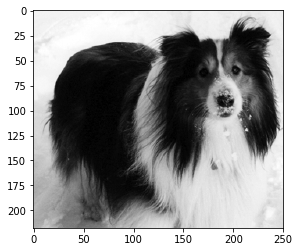

(1, 218, 249, 1)


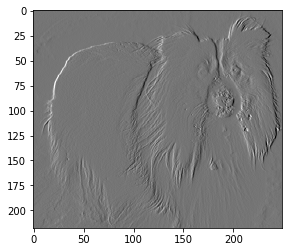

(1, 108, 124, 1)


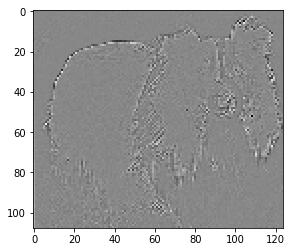

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

img = Image.open('dog.png')
img = img.convert('L', (0.2989, 0.5870, 0.1140, 0)) # convert to gray scale
img = np.asarray(img, dtype='float32')

plt.imshow(img, cmap='gray')
plt.show()

def edge_detector(img, kernel, strides):
    #with tf.Graph().as_default():
                
        # reshape image to conform with conv2d requirements
        img_shape = img.shape
        img_conv = img.reshape(1, img_shape[0], img_shape[1], 1)
        x = tf.placeholder('float32', [1, None, None, 1])
        k = tf.get_variable('k', initializer=tf.to_float(kernel))
        #k = kernel
        # apply convolution
        conv = tf.nn.conv2d(x, k, strides=strides, padding='VALID')
        
        # Implement Max pooling layer
        # TODO    
        #ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        #pool = tf.layers.max_pooling2d(inputs=conv, pool_size=[2, 2], strides=strides)

        init = tf.global_variables_initializer()    
        with tf.Session() as session:
            session.run(init)
            conv_op = session.run(conv, feed_dict={x: img_conv})
            plt.imshow(conv_op[0, :, :, 0], cmap='gray')
            print (conv_op.shape)
            plt.show()

# Implement kernel1 and store respective strides to strides1
# TODO
with tf.variable_scope('kernel1') as scope:
    kernel1 = tf.constant([1, -1])
    kernel1 = tf.reshape(kernel1, [1, 2, 1, 1])
    strides1 = [1, 1, 1, 1]
    edge_detector(img,kernel1,strides1)

# Implement kernel2 and store respective strides to strides2
# TODO
with tf.variable_scope('kernel2') as scope:
    kernel2 = tf.constant([[0,1,0],[1, -4, 1],[0, 1, 0]])
    kernel2 = tf.reshape(kernel2, [3, 3, 1, 1])

    strides2 = [1, 2, 2, 1]
    edge_detector(img,kernel2,strides2)

(1, 108, 125, 1)


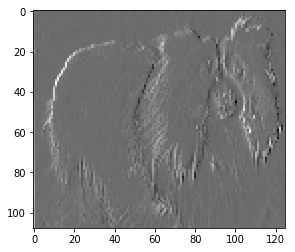

In [2]:
def edge_detector2(img, kernel, strides):
    #with tf.Graph().as_default():
                
        # reshape image to conform with conv2d requirements
        img_shape = img.shape
        img_conv = img.reshape(1, img_shape[0], img_shape[1], 1)
        x = tf.placeholder('float32', [1, None, None, 1])
        k = tf.get_variable('k', initializer=tf.to_float(kernel))
        #k = kernel
        # apply convolution
        conv = tf.nn.conv2d(x, k, strides=strides, padding='VALID')
        
        # Implement Max pooling layer
        # TODO    
        pool = tf.layers.max_pooling2d(inputs=conv, pool_size=[3, 1], strides=(2, 2))

        init = tf.global_variables_initializer()    
        with tf.Session() as session:
            session.run(init)
            pool_op = session.run(pool, feed_dict={x: img_conv})
            plt.imshow(pool_op[0, :, :, 0], cmap='gray')
            print (pool_op.shape)
            plt.show()
            
with tf.variable_scope('max_pool') as scope:
    kernel1 = tf.constant([1, -1])
    kernel1 = tf.reshape(kernel1, [1, 2, 1, 1])
    strides1 = [1, 1, 1, 1]
    edge_detector2(img,kernel1,strides1)

(1, 109, 125, 1)


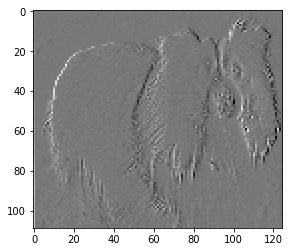

In [3]:
with tf.variable_scope('task_e') as scope:
    kernel1 = tf.constant([1, -1])
    kernel1 = tf.reshape(kernel1, [1, 2, 1, 1])
    strides1 = [1, 2, 2, 1]
    edge_detector(img,kernel1,strides1)

### Exercise 3. Convolution in Neural Networks: Theory (4 points)

**Goal:** To answer the following question with True (T) and False (F) with **justification**.

Following are statements that you should answer with either a True or a False. And, also provide a justification as to why you think so. To answer these questions, you will need to revisit the lecture slides and read the chapter 9 of the Deep learning book: [ConvNets](http://www.deeplearningbook.org/contents/convnets.html).

a) Pooling needs to be removed for handling inputs of varying size. \[T/F\] **(1 point)**

b) Given a multilayered convolution neural network, a cell in a second convolutional layer has the same-sized receptive field as a cell in the first convolutional layer. \[T/F\] **(1 point)**

c) In the context of edge detection, a convolutional neural network learns features for each pixel separately. \[T/F\] **(1 point)**

d) There is an exponential increase in kernel parameters when convolutional net's capabilities are increased to handle transformations like rotation, scaling etc. \[T/F\] **(1 point)**

---

## Submission instructions
You should provide a single Jupyter notebook as the solution. The naming should include the assignment number and matriculation IDs of all members in your team in the following format:
**assignment-9_matriculation1_matriculation2_matriculation3.ipynb** (in case of 3 members in a team). 
Make sure to keep the order matriculation1_matriculation2_matriculation3 the same for all assignments.

Please submit the solution to your tutor (with **[NNIA][assignment-9]** in email subject):
1. Maksym Andriushchenko <s8mmandr@stud.uni-saarland.de>
2. Marius Mosbach <s9msmosb@stud.uni-saarland.de>
3. Rajarshi Biswas <rbisw17@gmail.com>
4. Marimuthu Kalimuthu <s8makali@stud.uni-saarland.de>

Note :  **If you are in a team, you should submit only 1 solution to only 1 tutor.** <br>
$\hspace{2em}$ **Submissions violating these rules will not be graded.**